In [2]:

import numpy as np

def gauss_jacobi(
    A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()

    return x


In [3]:

def gauss_seidel(
    A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float)
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()

    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()

    return x


[08-19 10:59:03][INFO] i= 0 x: [[1. 1.]]
[08-19 10:59:03][INFO] i= 1 x: [[6.  0.4]]
[08-19 10:59:03][INFO] i= 2 x: [[6.6 2.4]]
[08-19 10:59:03][INFO] i= 3 x: [[4.6  2.64]]
[08-19 10:59:03][INFO] i= 4 x: [[4.36 1.84]]
[08-19 10:59:03][INFO] i= 5 x: [[5.16  1.744]]
[08-19 10:59:03][INFO] i= 6 x: [[5.256 2.064]]
[08-19 10:59:03][INFO] i= 7 x: [[4.936  2.1024]]
[08-19 10:59:03][INFO] i= 8 x: [[4.8976 1.9744]]
[08-19 10:59:03][INFO] i= 9 x: [[5.0256  1.95904]]
[08-19 10:59:03][INFO] i= 10 x: [[5.04096 2.01024]]
[08-19 10:59:03][INFO] i= 11 x: [[4.98976  2.016384]]
[08-19 10:59:03][INFO] i= 12 x: [[4.983616 1.995904]]
[08-19 10:59:03][INFO] i= 13 x: [[5.004096  1.9934464]]
[08-19 10:59:03][INFO] i= 14 x: [[5.0065536 2.0016384]]
[08-19 10:59:03][INFO] i= 15 x: [[4.9983616  2.00262144]]
[08-19 10:59:03][INFO] i= 16 x: [[4.99737856 1.99934464]]
[08-19 10:59:03][INFO] i= 17 x: [[5.00065536 1.99895142]]
[08-19 10:59:03][INFO] i= 18 x: [[5.00104858 2.00026214]]
[08-19 10:59:03][INFO] i= 19 x: [[4.

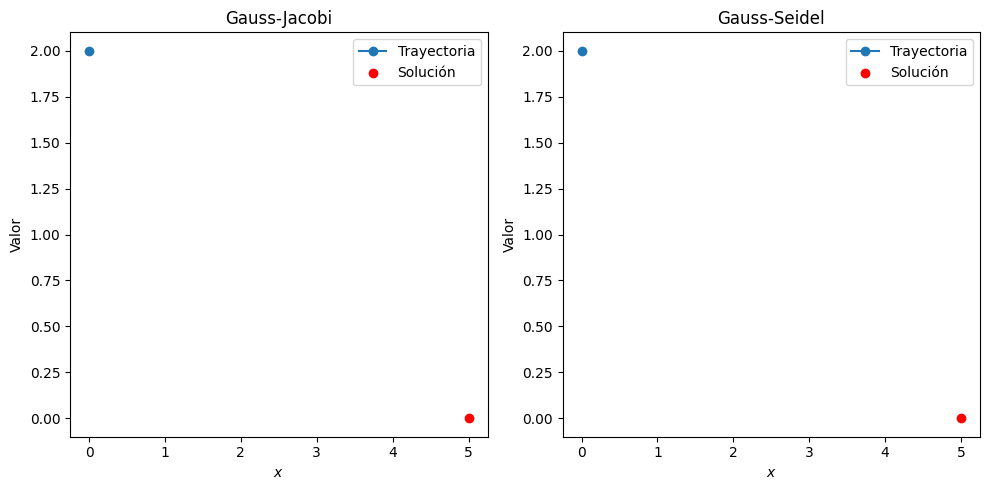

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from src import gauss_jacobi, gauss_seidel


A = [[1, 1], [-2, 5]]
b = [7, 0]
n = len(A)


sol_jacobi, iteraciones_jacobi = gauss_jacobi(A=A, b=b, x0=[1]*n, tol=1e-5, max_iter=1000)
sol_seidel, iteraciones_seidel = gauss_seidel(A=A, b=b, x0=[1]*n, tol=1e-5, max_iter=1000)



# Graficar las trayectorias
iteraciones_jacobi = np.array(iteraciones_jacobi)
iteraciones_seidel = np.array(iteraciones_seidel)

plt.figure(figsize=(10, 5))

# Gauss-Jacobi
plt.subplot(1, 2, 1)
plt.plot(iteraciones_jacobi, marker='o', label='Trayectoria')
plt.scatter(sol_jacobi, 0, color='red', label='Solución')
plt.title('Gauss-Jacobi')
plt.xlabel('$x$')
plt.ylabel('Valor')
plt.legend()

# Gauss-Seidel
plt.subplot(1, 2, 2)
plt.plot(iteraciones_seidel, marker='o', label='Trayectoria')
plt.scatter(sol_seidel, 0, color='red', label='Solución')
plt.title('Gauss-Seidel')
plt.xlabel('$x$')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from src import gauss_jacobi, gauss_seidel


A = [[1, 1], [-2, 5]]
b = [7, 0]
n = len(A)


sol_jacobi, iteraciones_jacobi = gauss_jacobi(A=A, b=b, x0=[1]*n, tol=1e-5, max_iter=1000)
sol_seidel, iteraciones_seidel = gauss_seidel(A=A, b=b, x0=[1]*n, tol=1e-5, max_iter=1000)



# Graficar las trayectorias
iteraciones_jacobi = np.array(iteraciones_jacobi)
iteraciones_seidel = np.array(iteraciones_seidel)

plt.figure(figsize=(10, 5))

# Gauss-Jacobi
plt.subplot(1, 2, 1)
plt.plot(iteraciones_jacobi, marker='o', label='Trayectoria')
plt.scatter(sol_jacobi, 0, color='red', label='Solución')
plt.title('Gauss-Jacobi')
plt.xlabel('$x$')
plt.ylabel('Valor')
plt.legend()

# Gauss-Seidel
plt.subplot(1, 2, 2)
plt.plot(iteraciones_seidel, marker='o', label='Trayectoria')
plt.scatter(sol_seidel, 0, color='red', label='Solución')
plt.title('Gauss-Seidel')
plt.xlabel('$x$')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()